<h1>Lung Cancer Prediction Logictic Regression Model

<h2> Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LogisticRegression as LR

<h1> 

In [2]:
df=pd.read_csv("C:/Users/rohan/Downloads/LungCancer1/survey lung cancer.csv")

In [3]:

print(df.columns)
#1->no , 2->yes


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [4]:
train_set=df.sample(frac=0.75,random_state=1)
test_set=df.drop(train_set.index)
feature_train,label_train=train_set.iloc[:,1:-1],train_set.iloc[:,-1]
feature_test,label_test=test_set.iloc[:,1:-1],test_set.iloc[:,-1]
label_train=label_train.map({"YES":1,"NO":0})
label_test=label_test.map({"YES":1,"NO":0})
feature_train,feature_test=feature_train.astype(float),feature_test.astype(float)

In [5]:
#train_label_dataframe=pd.DataFrame(label_train)

c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


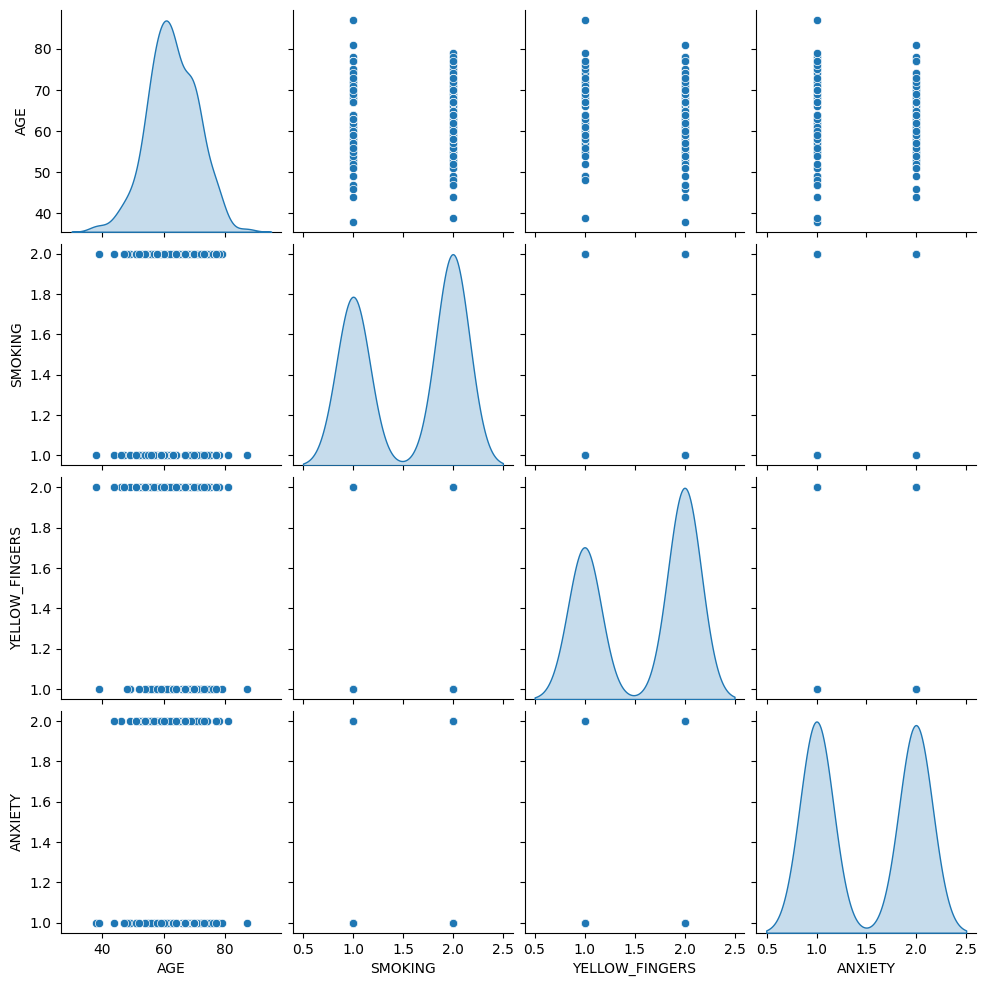

In [6]:
#Checking How features are inter-related to each other
sns.pairplot(train_set.iloc[:,0:5],diag_kind='kde')

In [7]:
train_set.describe().transpose

<bound method DataFrame.transpose of               AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  232.000000  232.000000      232.000000  232.000000     232.000000   
mean    62.818966    1.556034        1.581897    1.495690       1.512931   
std      7.939271    0.497924        0.494314    0.501062       0.500913   
min     38.000000    1.000000        1.000000    1.000000       1.000000   
25%     58.000000    1.000000        1.000000    1.000000       1.000000   
50%     63.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       232.000000  232.000000  232.000000  232.000000         232.000000   
mean          1.504310    1.650862    1.560345    1.573276           1.573276   
std           0.501062    0.477728 

In [8]:
class Normalize(tf.Module):
    def __init__(self,x):
        self.mean=tf.Variable(tf.math.reduce_mean(x,axis=0))
        self.std=tf.Variable(tf.math.reduce_std(x,axis=0))
    def norm(self,x):
        return(x-self.mean)/self.std
    def unnorm(self,x):
        return(x*self.std)+self.mean
norm_feature=Normalize(feature_train)


In [9]:
#Building an ML model
Lung_Cancer_Model=LR(solver="liblinear")
#Fitting dataset
Lung_Cancer_Model.fit(feature_train,label_train)

LogisticRegression(solver='liblinear')

In [10]:
print("Score % with train set",((Lung_Cancer_Model.score(feature_train,label_train))*100))
print("Score % with test set",((Lung_Cancer_Model.score(feature_test,label_test))*100))

Score % with train set 90.94827586206897
Score % with test set 83.11688311688312


In [11]:
print(label_test[66:67])

254    1
Name: LUNG_CANCER, dtype: int64


In [12]:
print(feature_test.iloc[6:7])

     AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
23  60.0      2.0             1.0      1.0            1.0              1.0   

    FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
23       2.0       2.0       2.0                2.0       2.0   

    SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
23                  2.0                    1.0         2.0  


In [13]:
Lung_Cancer_Model.predict(feature_test.iloc[66:67])

array([1], dtype=int64)

In [14]:
def checkIfCancer(x):
    if(Lung_Cancer_Model.predict(x)==1):
        return("You Have Cancer")
    else:
        return("You don't have Cancer")
print(checkIfCancer(feature_test.iloc[65:66]))

You Have Cancer
